### Load Dataset

Let's load a dataset and have a look at first 5 rows.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# read the dataset
data_BM = pd.read_csv('datasets/bigmart_data.csv')

# drop the null values
data_BM = data_BM.dropna(how='any')

# view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


# 3. Line Chart

- We will create a line chart to denote the mean price per item. Let's have a look at the code.
- With some datasets, you want to understand changes in one variable as a function of time, or a similarly continuous variable.
- In matplotlib, **line chart** is the default plot when using plot().

In [39]:
# mean price based on item type
price_by_item = data_BM.groupby('Item_Type').Item_MRP.mean()[:10]

price_by_item

Item_Type
Baking Goods             125.795653
Breads                   141.300639
Breakfast                134.090683
Canned                   138.551179
Dairy                    149.481471
Frozen Foods             140.095830
Fruits and Vegetables    145.418257
Hard Drinks              140.102908
Health and Hygiene       131.437324
Household                149.884244
Name: Item_MRP, dtype: float64

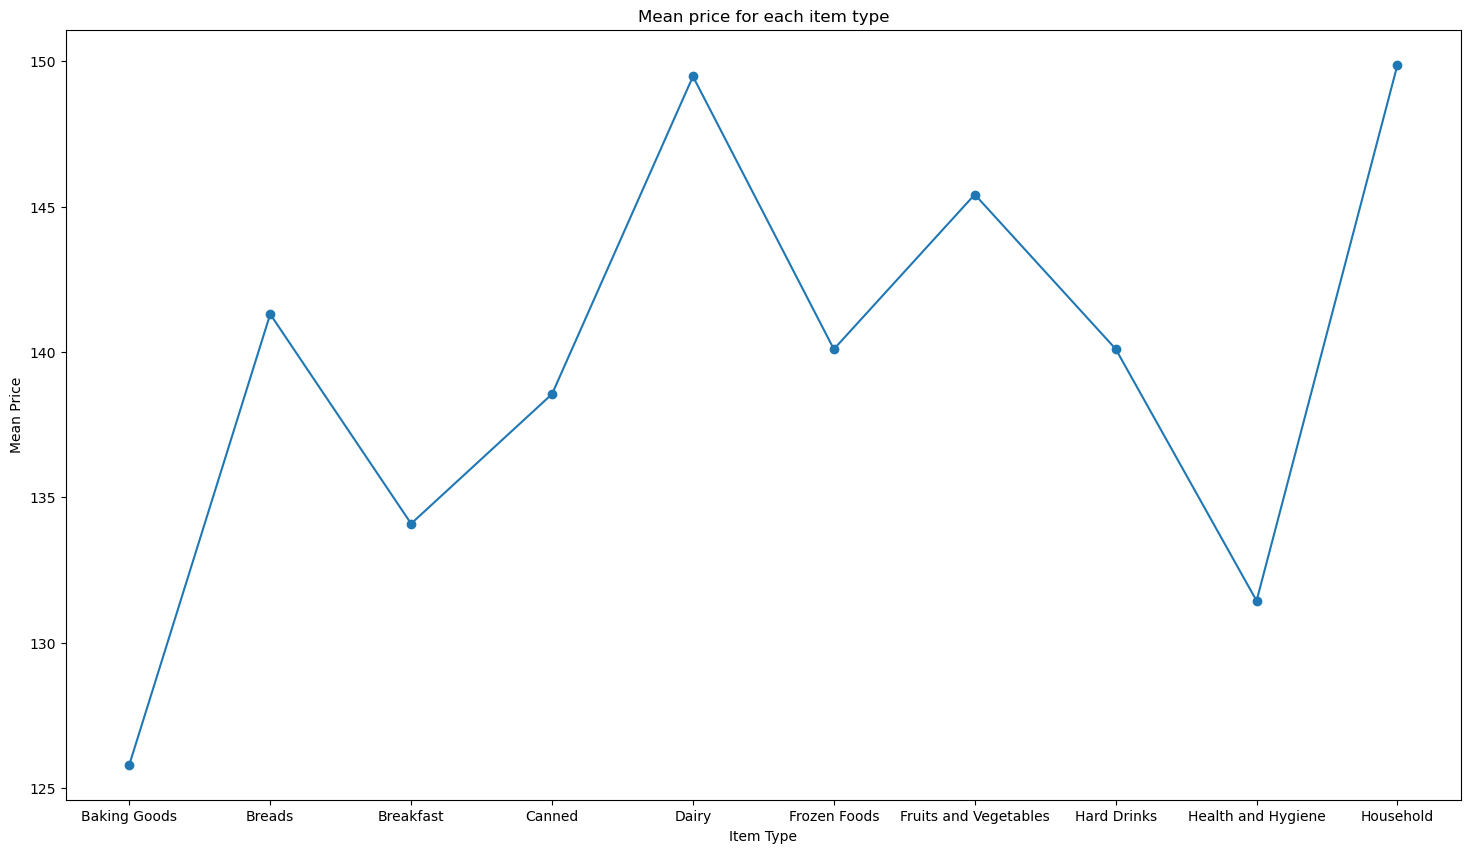

In [40]:
x = price_by_item.index.tolist()
y = price_by_item.values.tolist()

# set figure size
plt.figure(figsize=(18, 10))

# set title 
plt.title('Mean price for each item type')

# set axis labels
plt.xlabel('Item Type')
plt.ylabel('Mean Price')

# set xticks
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.plot(x, y, marker='o')

# 4. Bar Chart

- Suppose we want to have a look at **what is the mean sales for each outlet type?**
- A bar chart is another simple type of visualization that is used for categorical variables.
- You can use plt.bar() instead of plt.plot() to create a bar chart.


In [41]:
# sales by outlet size 
sales_by_outlet_size = data_BM.groupby('Outlet_Size').Item_Outlet_Sales.mean()

# sort by sales
sales_by_outlet_size.sort_values(inplace=True)

sales_by_outlet_size

Outlet_Size
Medium    2172.116599
High      2298.995256
Small     2358.343066
Name: Item_Outlet_Sales, dtype: float64

<BarContainer object of 3 artists>

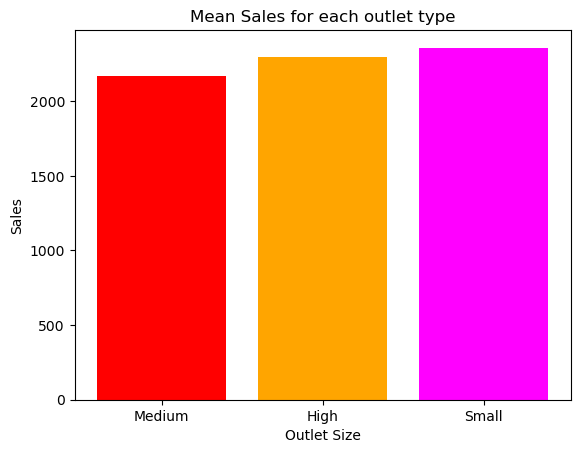

In [42]:
x = sales_by_outlet_size.index.to_list()
y = sales_by_outlet_size.values.tolist()

# set axis labels 
plt.xlabel('Outlet Size')
plt.ylabel('Sales')

# set title
plt.title('Mean Sales for each outlet type')

# set xticks
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x, y, color=['red', 'orange', 'magenta'])

# 5. Histograms
- **Distribution of Item price**
- Histograms are very common type of plotswhen we are looking at the data light and weight, stock prices, waiting time for customer, etc which are continuous in nature.
- Histograms data is plotted within a range against its frequency.
- Histograms are very commonly occuring graphs in probability and stastics and form the basis for various distributions like the normal-distribution, t-distribution, etc.
- You can use plt.hist() to draw a histogram. It provides many parameters to adjust the plot.


(array([ 70., 119., 113., 109.,  85., 106.,  75.,  29.,  10.,  82.,  76.,
        111., 117., 148., 138., 130., 127., 147., 138., 138., 118.,  46.,
          8., 133., 138., 125., 116., 122., 107., 110., 126., 139., 138.,
        123., 131.,  97.,   2.,  39.,  68.,  50.,  62.,  69.,  78.,  44.,
         63.,  50.,  60.,  77.,  75.,  68.]),
 array([ 31.49    ,  36.197968,  40.905936,  45.613904,  50.321872,
         55.02984 ,  59.737808,  64.445776,  69.153744,  73.861712,
         78.56968 ,  83.277648,  87.985616,  92.693584,  97.401552,
        102.10952 , 106.817488, 111.525456, 116.233424, 120.941392,
        125.64936 , 130.357328, 135.065296, 139.773264, 144.481232,
        149.1892  , 153.897168, 158.605136, 163.313104, 168.021072,
        172.72904 , 177.437008, 182.144976, 186.852944, 191.560912,
        196.26888 , 200.976848, 205.684816, 210.392784, 215.100752,
        219.80872 , 224.516688, 229.224656, 233.932624, 238.640592,
        243.34856 , 248.056528, 252.764496, 25

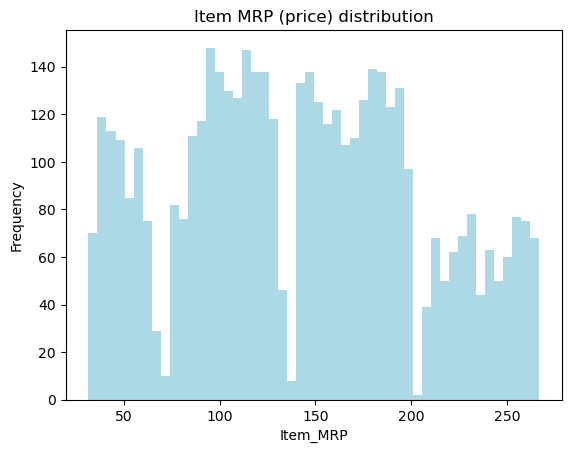

In [43]:
# title
plt.title('Item MRP (price) distribution')

# x label
plt.xlabel('Item_MRP')

# y label
plt.ylabel('Frequency')

# plot histogram
plt.hist(data_BM['Item_MRP'], bins=50, color='lightblue')

# 6. Box Plots
- **Distribution of sales**
- Box plot shows the three quartile values of the distribution along with extrem values.
- The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile and then observations that fall outside this range are displayed independently.
- This means that each value in the boxplot corresponds to an actual observation in the data.
- Let's try to visualize the distribution of Item_Outlet_Sales of items.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a23110ac70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23110b400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23110a8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a23110b5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a23110bca0>],
 'means': []}

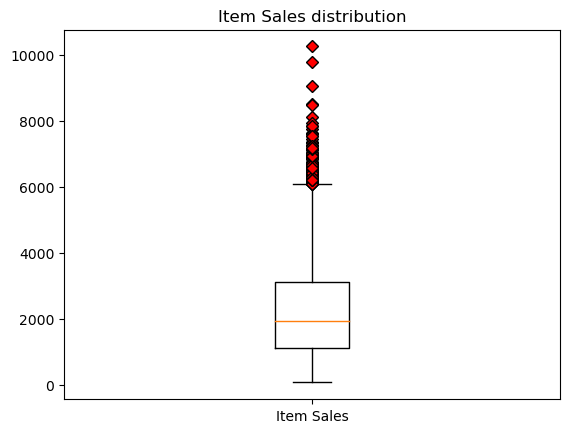

In [44]:
data = data_BM[['Item_Outlet_Sales']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
plt.title('Item Sales distribution')

# make the boxplot
plt.boxplot(data.values, labels=['Item Sales'], flierprops=red_diamond)

- You can also create multiple boxplots for different columns of your dataset.
- In order to plot multiple boxplots, you can use the same subplots() that we saw earlier
- Let's see Item_Weight, Item_MRP distribution together.

In [45]:
data = data_BM[["Item_Weight", "Item_MRP"]]
data

,Item_Weight,Item_MRP
0,9.300,249.8092
1,5.920,48.2692
2,17.500,141.6180
4,8.930,53.8614
5,10.395,51.4008
...,...,...
8517,20.750,178.8318
8518,6.865,214.5218
8520,10.600,85.1224
8521,7.210,103.1332


{'whiskers': [<matplotlib.lines.Line2D at 0x1a231699ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2316a7130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2316999a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a2316a7910>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a2316a7e50>,
 'means': []}

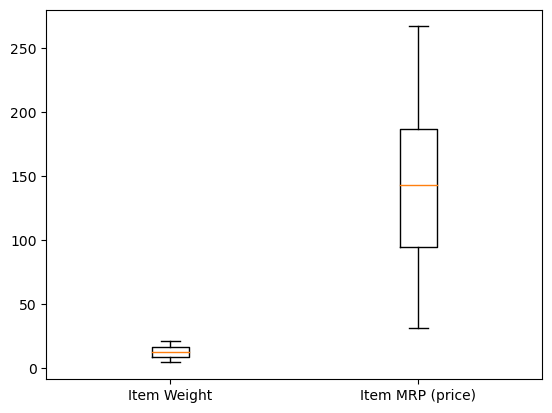

In [48]:
# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# generate subplots
fig, ax = plt.subplots()

# make the boxplot
plt.boxplot(data.values, labels= ['Item Weight', 'Item MRP (price)'], flierprops=red_diamond)

# 7. Violin Plots
- **Density distribution of item weghts and item price**

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a230f1a370>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a230f1a550>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a2312c37c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a2312c3e50>}

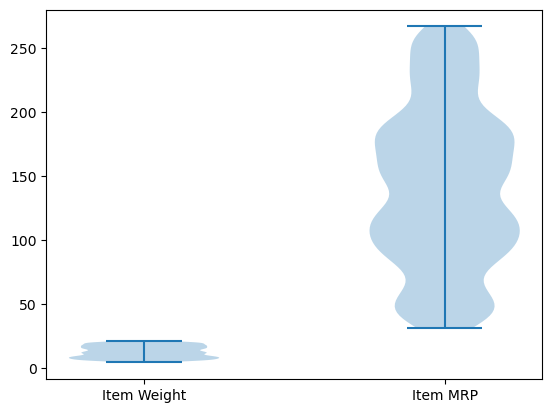

In [49]:
data = data_BM[['Item_Weight', 'Item_MRP']]

# generate subplots
#fig, ax = plt.subplots()

# add labels to x-axis
plt.xticks(ticks=[1,2], labels=['Item Weight', 'Item MRP'])

# make the violin plot
plt.violinplot(data.values)

# 8. Scatter Plots
- **Relative distribution of item weight and it's visibility**
- It depicts the distribution of two variables using a cloud of points, where each point represents an observation in the dataset.
- This depiction allows the eye to infer a substatial amount of information about whether there is any meaningful relationship between them. 

**Note: Here, we are going to use only a subset of the data for the plots**

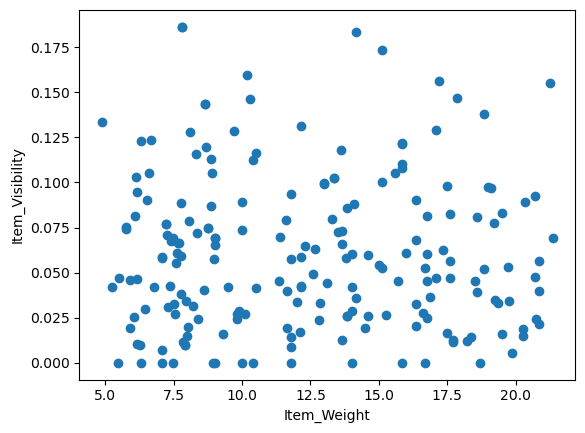

In [50]:
# set label of axes 
plt.xlabel("Item_Weight")
plt.ylabel('Item_Visibility')

# plot 
plt.scatter(data_BM['Item_Weight'][:200], data_BM['Item_Visibility'][:200])

# 9. Bubble Plots
- **Relative distribution of sales, item price and item visibility**
- Let's make a scatter plot of Item_Outet_Sales and Item_MRP and make the size of bubbles by the column Item_Visisbility.
- Bubble plots let you understand the interdendent relations among 3 variables.

**Note that we are only using a subset of data for the plots.**


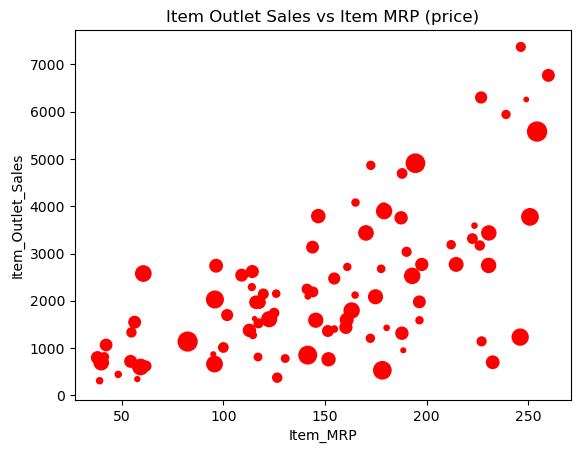

In [52]:
# set labels of axes
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')

# set title 
plt.title('Item Outlet Sales vs Item MRP (price)')

# plot
plt.scatter(data_BM['Item_MRP'][:100], data_BM['Item_Outlet_Sales'][:100], s=data_BM['Item_Visibility'][:100]*1000, c='red')